In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# neural network
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# uploading dataset
from google.colab import files
upload = files.upload()

# reading datasets
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# first 5 records
df_train.head()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


* Dataset don't have any null values
* It has 9 categorical features, excluding `uniqueid`


In [5]:
# processing data
def processing(df, training=True):    
    # categorical columns in the dataset
    cat_c = ['bank_account', 'country', 'location_type', 
             'cellphone_access', 'gender_of_respondent',
            'relationship_with_head', 'marital_status', 
             'education_level', 'job_type']
    
    # handling categorical columns 
    df = df.drop(['uniqueid'], axis=1) # dropping uniqueid
    df = pd.get_dummies(df, columns=cat_c[1:], drop_first=True) # (one-hot encoding)

    feat_lab = {}  
    # preparing features and label(if data is for training)
    if training == True:
        feat_lab['features'] = df.drop(['bank_account'], axis=1)
        feat_lab['label'] = df['bank_account'].apply(lambda x: (0,1)[x=='Yes']) # label encoding
    else:
        feat_lab['features'] = df

    return feat_lab


**Note:** We are not dropping or changing dtype of `year` column. After few
trials its seems that it works better if don't do anything.
However we can try time-series or other model as well but since my submission file went from this model so we will stick to it

We are using all columns of the dataset except `uniqueid`. Also while One-Hot encoding, we used the parameter `drop_first=True` for reducing multicollinearity in the model.

In [6]:
# generating features and label
feature_label = processing(df_train, training=True)

# extracting features and label
features = feature_label['features']
label = feature_label['label']
print(features.shape, label.shape)

# train test split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=21)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(23524, 32) (23524,)
(18819, 32) (4705, 32) (18819,) (4705,)


In [7]:
# define the keras model
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=32, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))  
model.add(keras.layers.Dense(1, activation='sigmoid'))  ## activation='sigmoid' for binary class

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
performance = model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.2, shuffle=True)

Epoch 1/500
1506/1506 [==============================] - 7s 3ms/step - loss: 1.3997 - accuracy: 0.7869 - val_loss: 1.1342 - val_accuracy: 0.8576
Epoch 2/500
1506/1506 [==============================] - 4s 3ms/step - loss: 0.5300 - accuracy: 0.8387 - val_loss: 0.3918 - val_accuracy: 0.8629
Epoch 3/500
1506/1506 [==============================] - 4s 2ms/step - loss: 0.4274 - accuracy: 0.8527 - val_loss: 0.3649 - val_accuracy: 0.8576
Epoch 4/500
1506/1506 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8611 - val_loss: 0.3810 - val_accuracy: 0.8576
Epoch 5/500
1506/1506 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8648 - val_loss: 0.3629 - val_accuracy: 0.8576
Epoch 6/500
1506/1506 [==============================] - 4s 3ms/step - loss: 0.3576 - accuracy: 0.8702 - val_loss: 0.3612 - val_accuracy: 0.8576
Epoch 7/500
1506/1506 [==============================] - 4s 3ms/step - loss: 0.3580 - accuracy: 0.8674 - val_loss: 0.3173 - val_ac

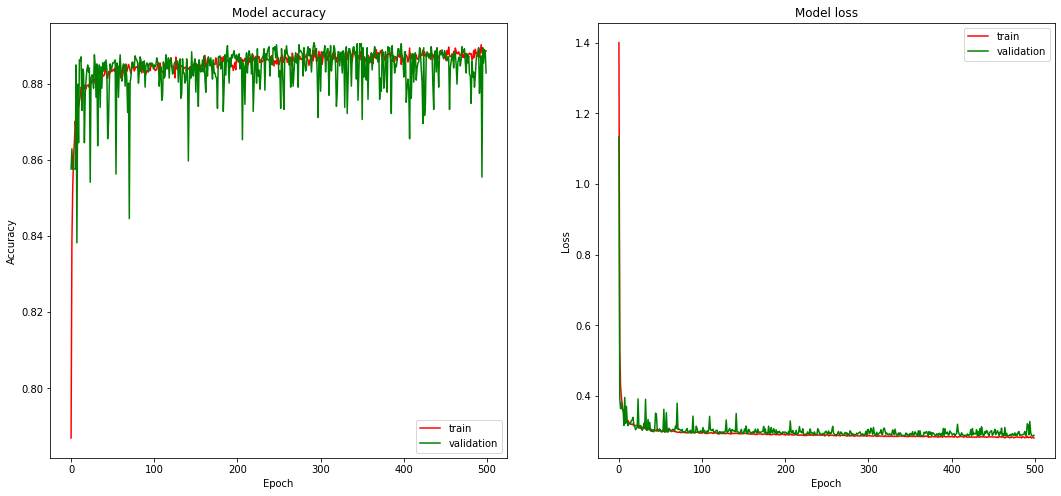

In [8]:
# modle performance visualization
# subplot
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# accuracy
ax1.plot(performance.history['accuracy'], color='red')
ax1.plot(performance.history['val_accuracy'], color='green')
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'], loc='lower right')

# "Loss"
ax2.plot(performance.history['loss'], color='red')
ax2.plot(performance.history['val_loss'], color='green')
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
# model prediction report
y_pred = model.predict(x_test) # testing model on validation data

# perfomance of the model
print('==========Confusion Matrix===============\n')
print(confusion_matrix(y_test, np.round(y_pred)))
print('\n=======Classification Report===========')
print(classification_report(y_test, np.round(y_pred)))

==========Confusion Matrix===============

[[3930  105]
 [ 431  239]]

=======Classification Report===========
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4035
           1       0.69      0.36      0.47       670

    accuracy                           0.89      4705
   macro avg       0.80      0.67      0.70      4705
weighted avg       0.87      0.89      0.87      4705



In [10]:
# training accuracy of the model
_ , accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 88.75


In [11]:
# testing accuracy of the model
_ , accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 88.61


In [12]:
# predicting testing data
feature_test = processing(df_test, training=False)['features']
y_pred_test = model.predict(feature_test)

# preparing submission file
subm = pd.DataFrame()
subm['uniqueid'] = df_test['uniqueid'] + ' x ' + df_test['country']
subm['bank_account'] = y_pred_test

subm.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0.787738
1,uniqueid_6060 x Kenya,0.823532
2,uniqueid_6065 x Kenya,0.015538
3,uniqueid_6072 x Kenya,0.025212
4,uniqueid_6073 x Kenya,0.040057


In [13]:
# exporting csv file
subm.to_csv('submission_v15.csv', index=False)